In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df.drop('Target', axis=1)
y = df['Target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [6]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [7]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [8]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Linear Regression MSE:", mse_lr)
print("Decision Tree MSE:", mse_dt)
print("Random Forest MSE:", mse_rf)

Linear Regression MSE: 0.5558915986952444
Decision Tree MSE: 0.495235205629094
Random Forest MSE: 0.2553684927247781


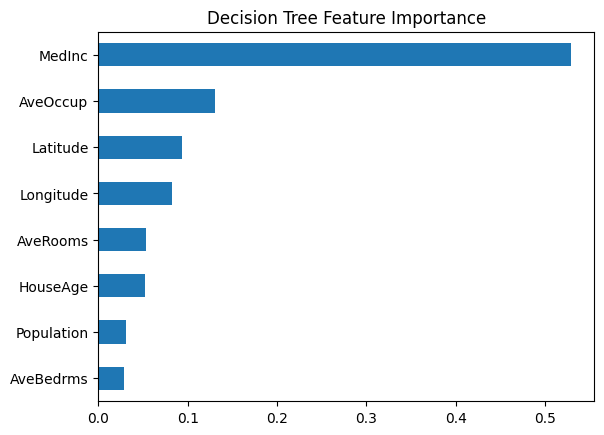

In [9]:
importance_dt = pd.Series(dt.feature_importances_, index=X.columns)
importance_dt.sort_values().plot(kind='barh')
plt.title("Decision Tree Feature Importance")
plt.show()

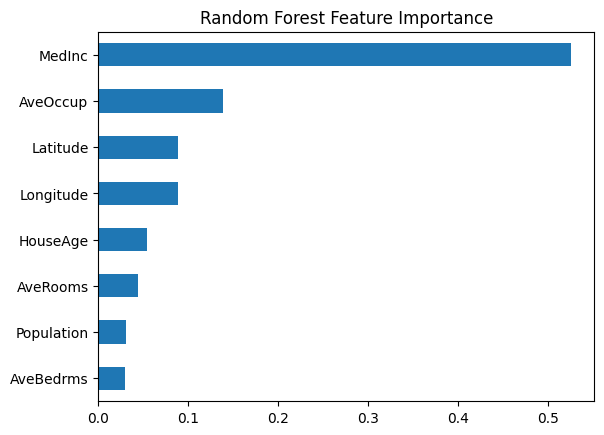

In [10]:
importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
importance_rf.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

In [12]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [13]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)

print("Before Tuning MSE:", mse_rf)
print("After Tuning MSE:", mse_best)

Before Tuning MSE: 0.2553684927247781
After Tuning MSE: 0.2558668230358652


In [14]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Tuned Random Forest"],
    "MSE": [mse_lr, mse_dt, mse_rf, mse_best]
})

print(results)


                 Model       MSE
0    Linear Regression  0.555892
1        Decision Tree  0.495235
2        Random Forest  0.255368
3  Tuned Random Forest  0.255867
